In [61]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("/home/abhishek/Downloads/train_ctrUa4K (1).csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
df.shape

(614, 13)

Insights drawn by looking at the output of describe function above:

1.LoanAmount has (614 – 592) 22 missing values.

2.Loan_Amount_Term has (614 – 600) 14 missing values.

3.Credit_History has (614 – 564) 50 missing values.

4.We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)

5.The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

In [64]:
df["Property_Area"].value_counts

<bound method IndexOpsMixin.value_counts of 0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
5          Urban
6          Urban
7      Semiurban
8          Urban
9      Semiurban
10         Urban
11         Urban
12         Urban
13         Rural
14         Urban
15         Urban
16         Urban
17         Urban
18         Rural
19         Urban
20         Urban
21         Urban
22     Semiurban
23         Rural
24     Semiurban
25     Semiurban
26     Semiurban
27         Urban
28         Urban
29     Semiurban
         ...    
584        Rural
585        Rural
586        Urban
587    Semiurban
588    Semiurban
589    Semiurban
590    Semiurban
591    Semiurban
592    Semiurban
593        Rural
594        Urban
595        Rural
596        Rural
597    Semiurban
598        Rural
599        Urban
600        Urban
601        Rural
602        Urban
603        Rural
604    Semiurban
605        Urban
606    Semiurban
607        Rural
608        Rural
609 

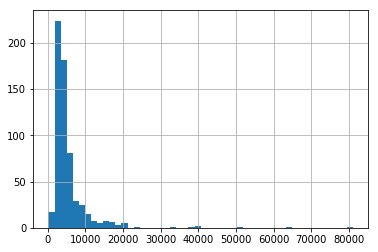

In [65]:
df['ApplicantIncome'].hist(bins=50)

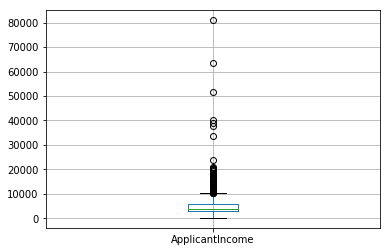

In [66]:
df.boxplot(column="ApplicantIncome")

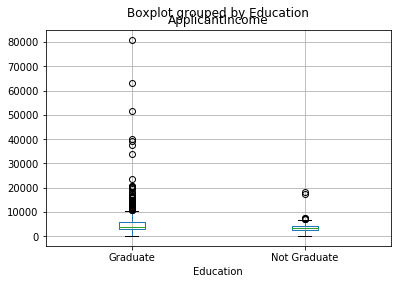

In [67]:
df.boxplot(column="ApplicantIncome", by="Education")

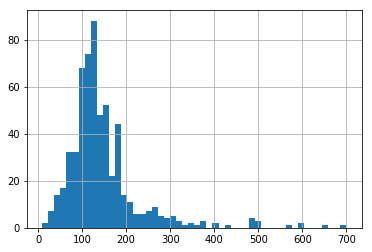

In [68]:
df['LoanAmount'].hist(bins=50)

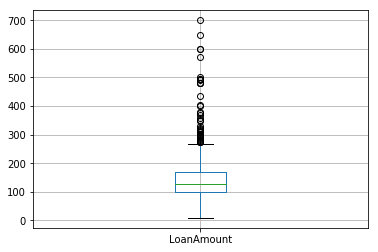

In [69]:
df.boxplot(column='LoanAmount')

In [70]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency table for credit history:')
print(temp1)
print('\nprobability of getting loan for each credit history is:')
print(temp2)

Frequency table for credit history:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

probability of getting loan for each credit history is:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

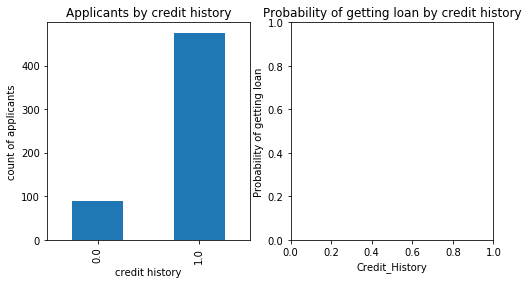

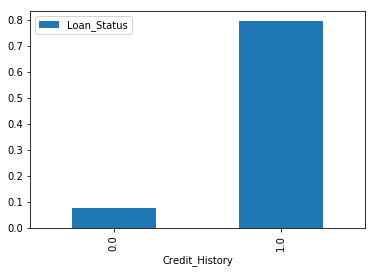

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("credit history")
ax1.set_ylabel("count of applicants")
ax1.set_title("Applicants by credit history")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

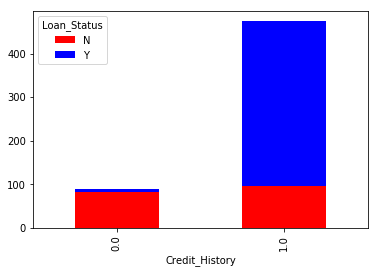

In [74]:
temp3 = pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [75]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [88]:
df['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
5      267.000000
6       95.000000
7      158.000000
8      168.000000
9      349.000000
10      70.000000
11     109.000000
12     200.000000
13     114.000000
14      17.000000
15     125.000000
16     100.000000
17      76.000000
18     133.000000
19     115.000000
20     104.000000
21     315.000000
22     116.000000
23     112.000000
24     151.000000
25     191.000000
26     122.000000
27     110.000000
28      35.000000
29     120.000000
          ...    
584    146.000000
585    172.000000
586    104.000000
587     70.000000
588     94.000000
589    106.000000
590     56.000000
591    205.000000
592    292.000000
593    142.000000
594    260.000000
595    110.000000
596    187.000000
597     88.000000
598    180.000000
599    192.000000
600    350.000000
601    155.000000
602    128.000000
603    172.000000
604    496.000000
605    146.412162
606    173.000000
607    157.000000
608    108

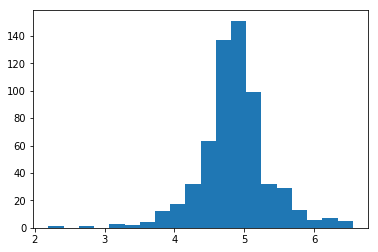

In [90]:
 df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20, grid=False)